In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [20]:
def boostrap(statistic_func, iterations, data):
	samples  = np.random.choice(data,replace = True, size = [iterations, len(data)])
	print samples.shape
	data_mean = data.mean()
	vals = []
	for sample in samples:
		sta = statistic_func(sample)
		#print sta
		vals.append(sta)
	b = np.array(vals)
	print b
	lower, upper = np.percentile(b, [2.5, 97.5])
	return data_mean,lower, upper

In [3]:
df = pd.read_csv('./vehicles.csv')
#print df.columns

In [4]:
df

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
5,15,35.0
6,14,24.0
7,14,19.0
8,14,28.0
9,15,23.0


(0, 45.0)

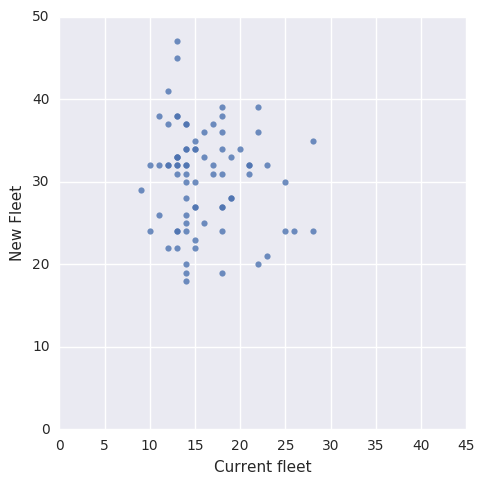

In [5]:
sns_plot = sns.lmplot(df.columns[0], df.columns[1], data=df, fit_reg=False)
sns_plot.axes[0,0].set_ylim(0,)
sns_plot.axes[0,0].set_xlim(0,)


In [6]:
data = df.values.T[0]

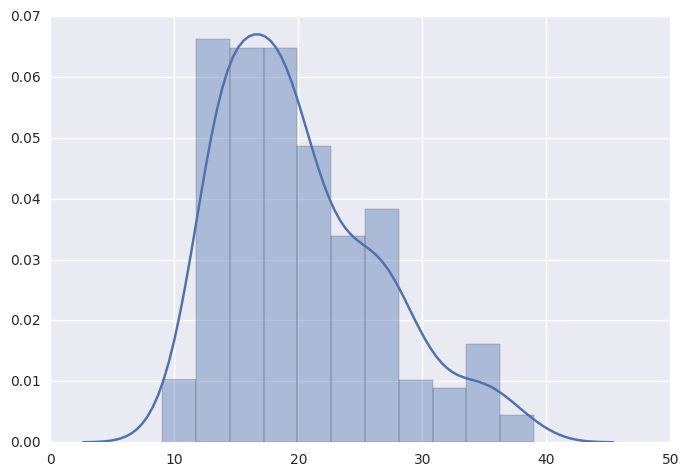

In [7]:
sns.distplot(data);

In [8]:
data2 = df.values.T[1][:79]

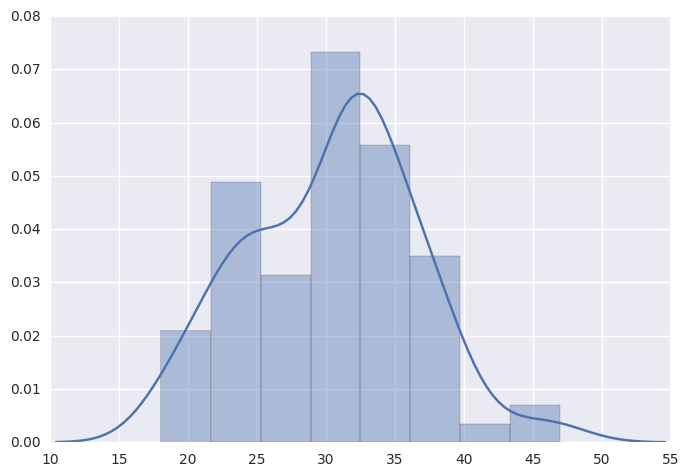

In [9]:
sns.distplot(data2);

In [42]:
boots = []
#for i in range(100,100000,1000):
for i in range(100,100000,1000):
	boot = boostrap(np.std, i, data)
	boots.append([i,boot[0], "mean"])
	boots.append([i,boot[1], "lower"])
	boots.append([i,boot[2], "upper"])

(100, 249)
[ 6.61000013  6.27418499  6.39959304  6.58237955  6.02514315  6.63763456
  6.29300482  6.3431062   6.10060915  6.45690467  6.59427234  6.41330883
  6.13559729  6.30745107  6.25526729  6.30060968  6.61082726  6.64112541
  6.49334627  6.58960395  6.41655976  6.10210535  5.80183555  6.48268908
  5.9683147   6.39463877  6.01237682  6.24363291  6.5356606   6.42092443
  6.38105725  5.7977476   6.07713466  6.06171653  6.34073339  6.30050472
  6.13523977  6.64758483  6.38895112  6.39377611  6.83353366  6.9454322
  5.99355578  6.31705589  6.19938546  6.32304033  6.59953132  6.39947206
  6.73167607  5.97115964  6.28076756  6.12345373  6.47073827  6.06519315
  6.51201816  6.27661379  6.55786525  5.85638018  6.26642195  6.40011471
  6.3742063   6.22164444  6.64621627  6.20004105  6.44576437  6.03916456
  6.49445151  6.03670434  6.01884376  6.59956798  6.87860953  6.48320655
  6.46877881  6.4609575   6.13531075  6.44222274  6.63733568  5.974967
  6.87121014  6.15770182  6.36551379  6.656

KeyboardInterrupt: 

In [36]:
boots2 = []
#for i in range(100,100000,1000):
for i in range(100,1000,1000):
	boot2 = boostrap(np.std, i, data2)
	boots2.append([i,boots[0], "mean"])
	boots2.append([i,boots[1], "lower"])
	boots2.append([i,boots[2], "upper"])

(100, 79)
[ 5.96555836  5.86937879  6.3980549   6.48143294  6.49595291  6.04384981
  7.04132058  6.17708549  5.63801504  5.87917112  5.77642524  6.14872033
  5.69797441  4.65258326  5.68970093  6.12705302  6.17962705  5.58068521
  5.69814313  5.80578145  5.76417948  6.45393374  6.38095227  6.29117744
  6.30387372  5.89569107  5.87298121  5.25360681  5.7406424   5.18261301
  6.06827046  6.2195839   6.58605053  6.68570161  6.718145    6.33642616
  5.74895405  6.13465834  5.99730218  6.35604397  5.62891339  6.30280608
  4.95769638  6.31973989  5.87213539  5.43074856  5.45709107  5.89544647
  5.92802528  5.56671386  5.31012281  6.02898516  5.6330394   5.74209362
  6.0931455   5.81945419  5.90660636  5.3714754   5.56636844  5.82600351
  6.33791793  6.95935507  5.54092146  6.25442     5.67066003  5.90144991
  6.17485429  6.07046166  5.54551747  5.68944747  6.25083234  5.43732405
  6.57158333  5.66217686  6.5048267   6.42773792  5.56763486  6.45244396
  5.36613318  5.86416228  5.93499476  5.6

In [ ]:
df_boot = pd.DataFrame(boots,  columns=['Boostrap Iterations','Mean',"Value"])
sns_plot = sns.lmplot(df_boot.columns[0],df_boot.columns[1], data=df_boot, fit_reg=False,  hue="Value")

In [14]:

sns_plot.axes[0,0].set_ylim(0,)
sns_plot.axes[0,0].set_xlim(0,100000)


(0, 100000)

In [ ]:
sns_plot.savefig("bootstrap_confidence1.pdf",bbox_inches='tight')